# İstenilen


1 - parite önceki saatlerde belirgin bir düşüş veya yükseliş trendi var mı baksın.  

2 - önceki saatlerin en düşük seviyeleri ve en yüksek seviyeleri ve önemli destek noktaları potansiyel likidite alanları olarak belirlensin.
10:00 - 13:00 UTC arasında, fiyatın önceki likidite alanlarını süpürmesi beklenir.
fiyat bu zaman diliminde önceki günün en düşük seviyesinin altına inerek veya enlikiditeyi toplar.
Likidite süpürüldükten sonra, fiyat hızlı bir şekilde yukarı veya aşağı yönlü hareket eder ve bir Fair Value Gap (FVG) oluşturur.
Aynı zamanda, piyasa yapısında bir değişim (Market Structure Shift - MSS) gözlemlenir, yani düşüş trendinden yükseliş veya yükseliş trendinden düşüş trendine geçiş sinyali alınır.
Fiyat, oluşturduğu FVG bölgesine geri döndüğünde, bu bölgeden alış veya satış işlemi yapılır.
Stop-loss, likidite süpürülmesinin hemen altına veya üstüne yerleştirilir.
Take-profit seviyeleri olarak, önceki direnç noktaları hedefler belirlenir.

kodlaması nedir

# Imports

In [1]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt

# Read & Arrange

In [6]:
# 📌 1. VERİYİ YÜKLEME
data = pd.read_csv("denemelik.csv")  # Elindeki OHLCV verisini buraya koy
data.columns = data.columns.str.lower()
data["timestamp"] = pd.to_datetime(data["timestamp"])
data.set_index('timestamp', inplace=True)

data["hour"] = data.index.hour  # Saat verisini tekrar al
time_window_data = data[(data['hour'] >= 10) & (data['hour'] <= 13)]


# 📌Dip, Tepe

## Saatlik

In [7]:
# 20, 40 ve 60 saat önceki tepe (high) ve dip (low) seviyelerini bulma
data['high_20h'] = data['high'].rolling(window=(20*60)).max()
data['low_20h'] = data['low'].rolling(window=(20*60)).min()

data['high_40h'] = data['high'].rolling(window=(40*60)).max()
data['low_40h'] = data['low'].rolling(window=(40*60)).min()

data['high_60h'] = data['high'].rolling(window=(60*60)).max()
data['low_60h'] = data['low'].rolling(window=(60*60)).min()

# Son satırdaki değerleri al
latest_data = data.iloc[-1][['high_20h', 'low_20h', 'high_40h', 'low_40h', 'high_60h', 'low_60h']]

# Sonuçları yazdır
print("📌 20 Saat Önce: Tepe:", latest_data['high_20h'], "Dip:", latest_data['low_20h'])
print("📌 40 Saat Önce: Tepe:", latest_data['high_40h'], "Dip:", latest_data['low_40h'])
print("📌 60 Saat Önce: Tepe:", latest_data['high_60h'], "Dip:", latest_data['low_60h'])


📌 20 Saat Önce: Tepe: 99168.609375 Dip: 95792.171875
📌 40 Saat Önce: Tepe: 99168.609375 Dip: 95792.171875
📌 60 Saat Önce: Tepe: 102514.171875 Dip: 95792.171875


## 5m

In [8]:
# 20, 40 ve 60 5m önceki tepe (high) ve dip (low) seviyelerini bulma
data['high_20m'] =data['high'].rolling(window=(20*5)).max()
data['low_20m'] = data['low'].rolling(window=(20*5)).min()

data['high_40m'] = data['high'].rolling(window=(40*5)).max()
data['low_40m'] = data['low'].rolling(window=(40*5)).min()

data['high_60m'] = data['high'].rolling(window=(60*5)).max()
data['low_60m'] = data['low'].rolling(window=(60*5)).min()

# Son satırdaki değerleri al
latest_data = data.iloc[-1][['high_20m', 'low_20m', 'high_40m', 'low_40m', 'high_60m', 'low_60m']]

# Sonuçları yazdır
print("📌 20 * 5m  Önce: Tepe:", latest_data['high_20m'], "Dip:", latest_data['low_20m'])
print("📌 40 * 5m  Önce: Tepe:", latest_data['high_40m'], "Dip:", latest_data['low_40m'])
print("📌 60 * 5m  Önce: Tepe:", latest_data['high_60m'], "Dip:", latest_data['low_60m'])

📌 20 * 5m  Önce: Tepe: 96931.2734375 Dip: 96212.90625
📌 40 * 5m  Önce: Tepe: 97057.59375 Dip: 95927.078125
📌 60 * 5m  Önce: Tepe: 97057.59375 Dip: 95792.171875


## 1m

In [9]:
# 20, 40 ve 60 1m önceki tepe (high) ve dip (low) seviyelerini bulma
data['high_20_1m'] =data['high'].rolling(window=(20)).max()
data['low_20_1m'] = data['low'].rolling(window=(20)).min()

data['high_40_1m'] = data['high'].rolling(window=(40)).max()
data['low_40_1m'] = data['low'].rolling(window=(40)).min()

data['high_60_1m'] = data['high'].rolling(window=(60)).max()
data['low_60_1m'] = data['low'].rolling(window=(60)).min()

# Son satırdaki değerleri al
latest_data = data.iloc[-1][['high_20_1m', 'low_20_1m', 'high_40_1m', 'low_40_1m', 'high_60_1m', 'low_60_1m']]

# Sonuçları yazdır
print("📌 20   Önce: Tepe:", latest_data['high_20_1m'], "Dip:", latest_data['low_20_1m'])
print("📌 40   Önce: Tepe:", latest_data['high_40_1m'], "Dip:", latest_data['low_40_1m'])
print("📌 60   Önce: Tepe:", latest_data['high_60_1m'], "Dip:", latest_data['low_60_1m'])

📌 20   Önce: Tepe: 96614.6796875 Dip: 96236.015625
📌 40   Önce: Tepe: 96786.609375 Dip: 96236.015625
📌 60   Önce: Tepe: 96931.2734375 Dip: 96236.015625


In [19]:
data

,open,close,high,low,volume,rsi14,rsi7,change_up,hour,high_20h,...,high_40m,low_40m,high_60m,low_60m,high_20_1m,low_20_1m,high_40_1m,low_40_1m,high_60_1m,low_60_1m
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-01-29 01:06:00+00:00,101823.437500,101823.437500,101823.437500,101823.437500,4.198400e+06,100.000000,100.000000,2,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-29 01:07:00+00:00,101873.921875,101873.921875,101873.921875,101873.921875,0.000000e+00,100.000000,100.000000,2,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-29 01:08:00+00:00,101869.515625,101869.515625,101869.515625,101869.515625,5.242880e+05,91.972673,91.972673,2,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-29 01:11:00+00:00,101857.789062,101857.789062,101857.789062,101857.789062,2.831647e+08,75.782808,75.782808,2,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-29 01:12:00+00:00,101859.617188,101859.617188,101859.617188,101859.617188,1.658880e+06,76.429631,76.429631,2,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-06 23:53:00+00:00,96553.992188,96553.992188,96553.992188,96553.992188,0.000000e+00,51.308496,77.058162,1,23,99168.609375,...,97057.59375,95870.820312,97057.59375,95792.171875,96678.468750,96236.015625,96786.609375,96236.015625,96931.273438,96236.015625
2025-02-06 23:54:00+00:00,96596.531250,96596.531250,96596.531250,96596.531250,0.000000e+00,49.108146,77.121909,0,23,99168.609375,...,97057.59375,95870.820312,97057.59375,95792.171875,96678.468750,96236.015625,96786.609375,96236.015625,96931.273438,96236.015625
2025-02-06 23:56:00+00:00,96609.601562,96609.601562,96609.601562,96609.601562,1.242718e+09,54.716479,77.569195,0,23,99168.609375,...,97057.59375,95870.820312,97057.59375,95792.171875,96650.148438,96236.015625,96786.609375,96236.015625,96931.273438,96236.015625


#Plt

In [10]:
# Son 100 barı grafik için al
plot_data = data.iloc[-3800:].copy()

# Saatlik Grafik için yatay çizgi seviyeleri
h_levels = [plot_data['high_20h'].iloc[-1], plot_data['high_40h'].iloc[-1], plot_data['high_60h'].iloc[-1]]
l_levels = [plot_data['low_20h'].iloc[-1], plot_data['low_40h'].iloc[-1], plot_data['low_60h'].iloc[-1]]
# 5 dakikalık Grafik için yatay çizgi seviyeleri
h_m_levels = [plot_data['high_20m'].iloc[-1], plot_data['high_40m'].iloc[-1], plot_data['high_60m'].iloc[-1]]
l_m_levels = [plot_data['low_20m'].iloc[-1], plot_data['low_40m'].iloc[-1], plot_data['low_60m'].iloc[-1]]

# Define colors based on levels' origin
colors = (['blue'] * len(h_levels) +  # Color for h_levels
          ['red'] * len(l_levels) +  # Color for l_levels
          ['yellow'] * len(h_m_levels) +  # Color for h_m_levels (e.g., green for middle high)
          ['orange'] * len(l_m_levels))  # Color for l_m_levels (e.g., orange for middle low)
# Combine all levels
all_levels = h_levels + l_levels + h_m_levels + l_m_levels


In [11]:
# 📌 Özel siyah tema oluştur
custom_style = mpf.make_mpf_style(
    base_mpl_style="dark_background",  # Siyah arka plan
    facecolor='black',  # Arka plan rengi siyah
    edgecolor='white',  # Kenar çizgileri beyaz
    gridcolor='gray',   # Grid çizgileri gri
    figcolor='black',   # Grafik arka planı siyah
    rc={"axes.labelcolor": "white", "xtick.color": "white", "ytick.color": "white"}
)

(<Figure size 800x575 with 2 Axes>, [<Axes: ylabel='Price'>, <Axes: >])

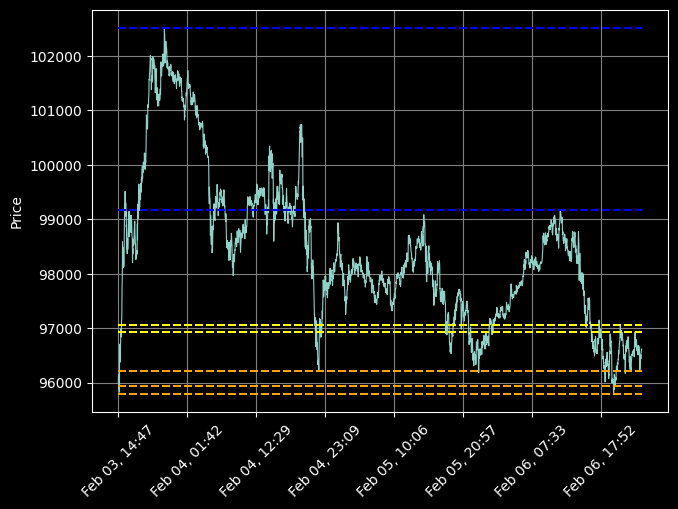

In [12]:
# Plotting with mplfinance
mpf.plot(
    plot_data,
    type='line',
    style=custom_style,
    hlines=dict(
        hlines=all_levels,  # All combined levels
        colors=colors,  # Corresponding colors
        linestyle='dashed'  # Corresponding styles
    ),
    returnfig=True
)

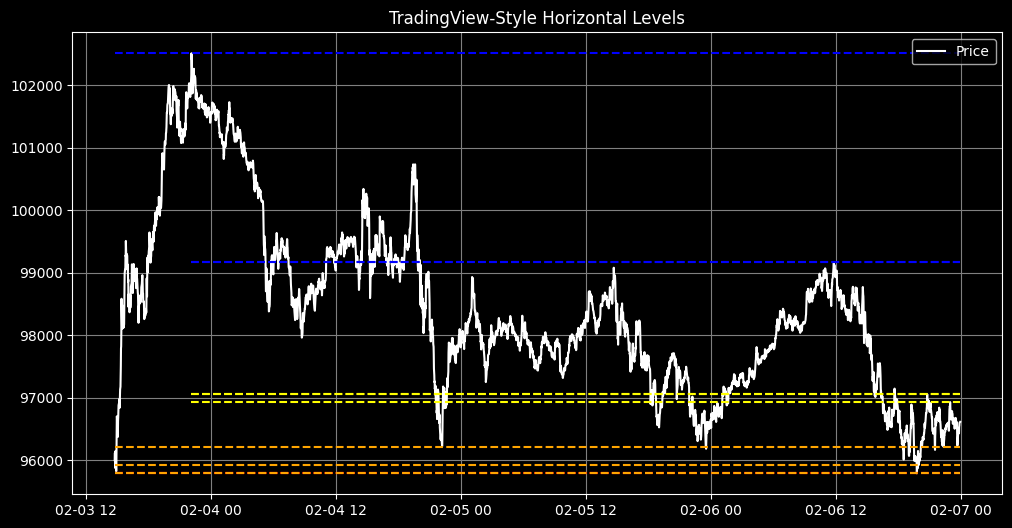

In [18]:
# Get the indices (dates) where these levels occurred
h_indices = [plot_data['high_20h'].dropna().idxmax(),
             plot_data['high_40h'].dropna().idxmax(),
             plot_data['high_60h'].dropna().idxmax()]

l_indices = [plot_data['low_20h'].dropna().idxmin(),
             plot_data['low_40h'].dropna().idxmin(),
             plot_data['low_60h'].dropna().idxmin()]

h_m_indices = [plot_data['high_20m'].dropna().idxmax(),
               plot_data['high_40m'].dropna().idxmax(),
               plot_data['high_60m'].dropna().idxmax()]

l_m_indices = [plot_data['low_20m'].dropna().idxmin(),
               plot_data['low_40m'].dropna().idxmin(),
               plot_data['low_60m'].dropna().idxmin()]


# Saatlik Grafik için yatay çizgi seviyeleri
h_levels = [plot_data['high_20h'].iloc[-1], plot_data['high_40h'].iloc[-1], plot_data['high_60h'].iloc[-1]]
l_levels = [plot_data['low_20h'].iloc[-1], plot_data['low_40h'].iloc[-1], plot_data['low_60h'].iloc[-1]]
# 5 dakikalık Grafik için yatay çizgi seviyeleri
h_m_levels = [plot_data['high_20m'].iloc[-1], plot_data['high_40m'].iloc[-1], plot_data['high_60m'].iloc[-1]]
l_m_levels = [plot_data['low_20m'].iloc[-1], plot_data['low_40m'].iloc[-1], plot_data['low_60m'].iloc[-1]]

# Define colors based on levels' origin
colors = (['blue'] * len(h_levels) +  # Color for h_levels
          ['red'] * len(l_levels) +  # Color for l_levels
          ['yellow'] * len(h_m_levels) +  # Color for h_m_levels (e.g., green for middle high)
          ['orange'] * len(l_m_levels))  # Color for l_m_levels (e.g., orange for middle low)

# Combine all levels
all_levels = h_levels + l_levels + h_m_levels + l_m_levels

# Combine all indices
all_indices = h_indices + l_indices + h_m_indices + l_m_indices
# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(plot_data.index, plot_data['close'], label="Price", color="white")

# Draw horizontal lines from their respective starting points
for level, index, color in zip(all_levels, all_indices, colors):
    ax.hlines(y=level, xmin=index, xmax=plot_data.index[-1], colors=color, linestyles="dashed")

# Format the chart
plt.legend()
plt.title("TradingView-Style Horizontal Levels")
plt.show()